In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image


---
# VIDEO: Rhythmicity in walking (gait)
---


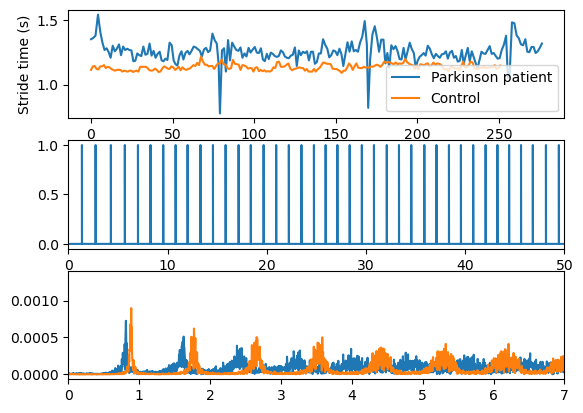

In [2]:
# Load the data. If you get an error on this line,
# make sure your Python session is in the same directory as the data.
matdata = sio.loadmat('gait.mat')

# extract data from mat file
park = matdata['park']
cont = matdata['cont']

# plot the gait speed for Parkinson's patient and control
plt.subplot2grid((3,1),(0,0))
plt.plot(park[:,0],park[:,1],label='Parkinson patient')
plt.plot(cont[:,0],cont[:,1],label='Control')
plt.xlabel('Time (sec.)')
plt.ylabel('Stride time (s)')
plt.legend()


#% define sampling rate
srate  = 1000

# create time series of steps
parkts = np.zeros(int(park[-1,0]*1000))
for i in range(0,len(park)):
    parkts[int(park[i,0]*1000-1)] = 1

# time vector and number of time points
parktx = np.arange(0,len(parkts))/srate
parkn  = len(parktx)


# repeat for control data
contts = np.zeros(int(cont[-1,0]*1000))
for i in range(0,len(cont)):
    contts[int(cont[i,0]*1000-1)] = 1

# time vector and number of time points
conttx = np.arange(0,len(contts))/srate
contn  = len(conttx)



# plot the time course of steps
plt.subplot2grid((3,1),(1,0))
plt.plot(parktx,parkts) # should be a stemplot, but that's really slow to render
plt.xlim([0,50])


# compute power for both datasets
parkPow = 2*np.abs(scipy.fftpack.fft(parkts)/parkn)
contPow = 2*np.abs(scipy.fftpack.fft(contts)/contn)

# compute separate frequencies vector for each subject
parkHz = np.linspace(0,srate/2,int(np.floor(parkn/2)+1))
contHz = np.linspace(0,srate/2,int(np.floor(contn/2)+1))

# show power spectra
plt.subplot2grid((3,1),(2,0))
plt.plot(parkHz[1:],parkPow[1:len(parkHz)])
plt.plot(contHz[1:],contPow[1:len(contHz)])
plt.xlim([0,7])

plt.show()

# SOURCES:
#  Data downloaded from https://physionet.org/physiobank/database/gaitdb/
#   Parkinson's patient data is pd1-si.txt
#   Young control data is y1-23.si.txt

1. Mục đích
Mã nguồn này phân tích và so sánh dữ liệu bước đi (gait data) của bệnh nhân Parkinson và nhóm đối chứng (control).

2. Các bước chính
Nạp dữ liệu từ tệp gait.mat.
Trích xuất dữ liệu: park (bệnh Parkinson) và cont (nhóm đối chứng).
Vẽ biểu đồ so sánh thời gian bước đi giữa hai nhóm.
Chuyển đổi dữ liệu thành chuỗi thời gian (time series) với tần suất lấy mẫu 1000 Hz.
Tính phổ công suất (Power Spectrum) sử dụng biến đổi Fourier (FFT).
Vẽ biểu đồ phổ công suất để phân tích sự khác biệt giữa hai nhóm.
3. Nhận xét
Sử dụng FFT để phân tích dao động bước đi.
Biểu đồ giúp trực quan hóa sự khác biệt giữa bệnh nhân Parkinson và nhóm đối chứng.
Có thể cải thiện bằng cách sử dụng plt.stem() thay vì plt.plot() cho chuỗi thời gian bước đi.


---
# VIDEO: Rhythmicity in brain waves
---


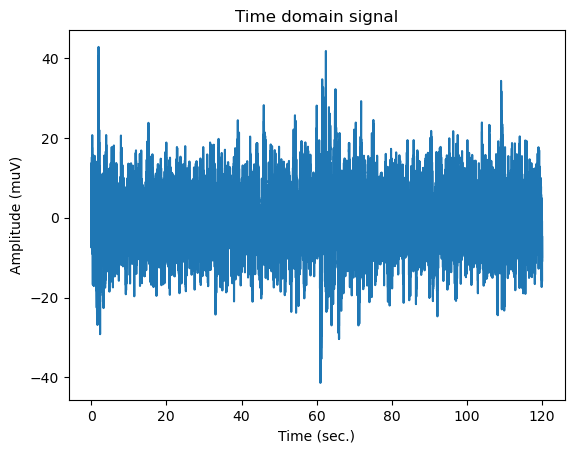

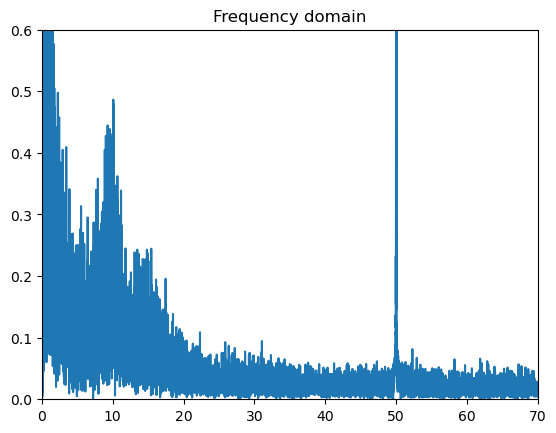

In [3]:

matdata = sio.loadmat('EEGrestingState.mat')

# extract data from mat file
eegdata = matdata['eegdata']
eegdata = eegdata[0]
srate   = matdata['srate']
srate   = srate[0]


n = len(eegdata)
timevec = np.arange(n)/srate

# compute amplitude spectrum
dataX    = scipy.fftpack.fft(eegdata)/n
ampspect = 2*abs(dataX)
hz       = np.linspace(0,srate/2,int(np.floor(n/2)+1))

plt.plot(timevec,eegdata)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (muV)')
plt.title('Time domain signal')
plt.show()

# show amplitude spectrum
plt.plot(hz,ampspect[0:int(np.floor(n/2)+1)])
plt.xlim([0,70])
plt.ylim([0,.6])
plt.title('Frequency domain')
plt.show()

1. Nạp dữ liệu
Đọc dữ liệu EEG (eegdata) và tần số lấy mẫu (srate) từ tệp .mat.
Tạo vector thời gian timevec dựa trên số mẫu (n) và tần số lấy mẫu.
2. Hiển thị tín hiệu trong miền thời gian
Vẽ tín hiệu EEG theo thời gian bằng plt.plot(timevec, eegdata).
3. Phân tích miền tần số
Tính biến đổi Fourier (FFT) để thu được phổ biên độ (ampspect).
Xây dựng trục tần số (hz) và chỉ lấy nửa đầu phổ tần số (do tính chất đối xứng của FFT).
Vẽ phổ tần số với trục x từ 0 đến 70 Hz.
4. Nhận xét
Mã chạy ổn, nhưng Amplitude (muV) nên viết đúng Amplitude (µV) để tránh lỗi escape sequence.
Có thể dùng plt.xscale('log') để hiển thị phổ tần số tốt hơn nếu cần.
Để lọc tín hiệu theo tần số cụ thể, có thể áp dụng bộ lọc thông thấp hoặc thông cao.

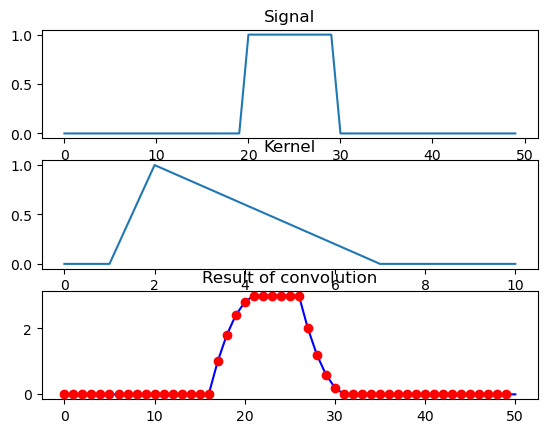

In [13]:

m = 50 # length of signal
n = 11 # length of kernel

signal = np.zeros(m)
signal[range(int(m*.4),int(m*.6))] = 1


kernel = np.zeros(n)
kernel[range(int(n*.25),int(n*.8))] = np.linspace(1,0,int(n*.55))


# plot signal
plt.subplot2grid((3,1),(0,0))
plt.plot(signal)
plt.title('Signal')

# plot kernel
plt.subplot2grid((3,1),(1,0))
plt.plot(kernel)
plt.title('Kernel')


# setup convolution parameters
nConv = m+n-1
halfk = np.floor(n/2)

# convolution as point-wise multiplication of spectra and inverse
mx = scipy.fftpack.fft(signal,nConv)
nx = scipy.fftpack.fft(kernel,nConv)
# here's the convolution:
convres = np.real( scipy.fftpack.ifft( np.multiply(mx,nx) ) )
# chop off the 'wings' of convolution
convres = convres[range(int(halfk),int(len(convres)-halfk+1))]


# plot the result of convolution
plt.subplot2grid((3,1),(2,0))
plt.plot(convres,'b')
plt.title('Result of convolution')

# for comparison, plot against the Python convolution function
plt.plot(np.convolve(signal,kernel,mode='same'),'ro')

plt.show()


---
# VIDEO: Convolution theorem
---


1. Khởi tạo dữ liệu
Tạo tín hiệu (signal): Chuỗi nhị phân dài 50 mẫu, với một đoạn từ 40% đến 60% của chiều dài có giá trị 1, còn lại là 0.
Tạo hạt nhân (kernel): Chuỗi dài 11 mẫu, với phần giữa có giá trị giảm dần từ 1 đến 0.
2. Vẽ tín hiệu và hạt nhân
Biểu đồ đầu tiên: Tín hiệu gốc (signal).
Biểu đồ thứ hai: Hạt nhân (kernel).
3. Tích chập bằng biến đổi Fourier
Tính biến đổi Fourier (FFT) của signal và kernel với kích thước nConv = m + n - 1.
Nhân phổ (mx * nx) rồi lấy biến đổi ngược (IFFT) để thu được kết quả tích chập (convres).
Cắt bớt phần dư thừa của tín hiệu để giữ nguyên kích thước hợp lý.
4. Vẽ kết quả tích chập
Biểu đồ thứ ba: Kết quả tích chập bằng FFT (màu xanh).
So sánh với hàm np.convolve() của NumPy (màu đỏ), giúp kiểm tra tính chính xác.
5. Nhận xét
Ưu điểm:

Sử dụng FFT giúp tăng tốc so với tích chập thông thường (đặc biệt với tín hiệu dài).
Biểu đồ so sánh giúp xác minh độ chính xác của phương pháp FFT.


---
# VIDEO: Narrowband temporal filtering
---


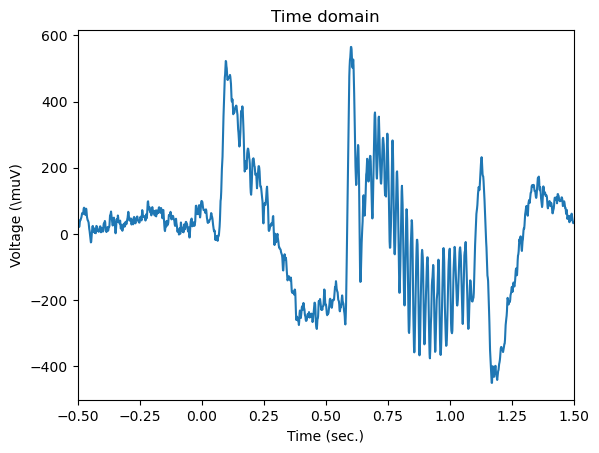

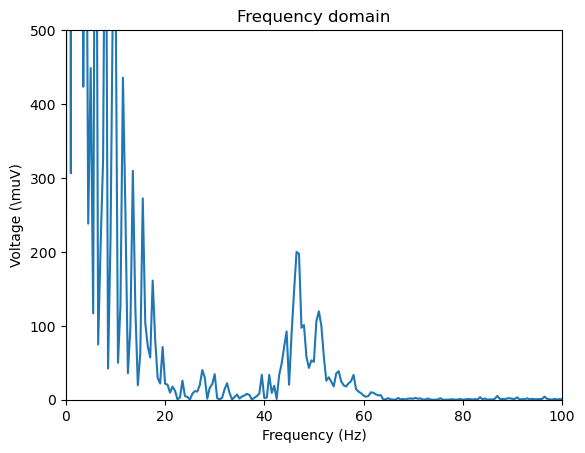

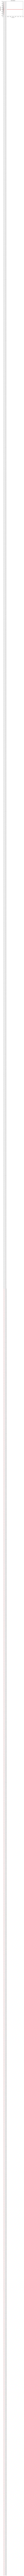

In [14]:

matdata = sio.loadmat('braindata.mat')

# extract data from mat file
timevec = matdata['timevec']
timevec = timevec[0]
srate    = matdata['srate']
srate    = srate[0]
braindata = matdata['braindata']
braindata = braindata[0]


n = len(timevec)

# plot time-domain signal
plt.plot(timevec,braindata)
plt.xlim([-.5,1.5])
plt.xlabel('Time (sec.)')
plt.ylabel(r'Voltage (\muV)')
plt.title('Time domain')
plt.show()


# compute power spectrum
dataX    = scipy.fftpack.fft(braindata)/n
ampspect = 2*np.abs(dataX)**2
hz       = np.linspace(0,srate,n) # out to srate as trick for the filter

# plot power spectrum
plt.plot(hz,ampspect[0:len(hz)])
plt.xlim([0,100])
plt.ylim([0,500])
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Voltage (\muV)')
plt.title('Frequency domain')
plt.show()


# specify which frequencies to filter
peakFiltFreqs = [2,47] # Hz

c = 'kr' # line colors

# loop over frequencies
for fi in range(0,len(peakFiltFreqs)):
    
    # construct the filter
    x  = hz-peakFiltFreqs[fi] # shifted frequencies
    fx = np.exp(-(x/4)**2)    # gaussian
    
    # apply the filter to the data
    filtdat = 2*np.real( scipy.fftpack.ifft( np.multiply(dataX,fx) ))
    
    # show the results
    plt.plot(timevec,filtdat,c[fi],label='%g Hz' %peakFiltFreqs[fi])
    plt.xlim([-.5,1.5])
    plt.xlabel('Time (sec.)')
    plt.ylabel(r'Voltage (\muV)')
    plt.title('Time domain')

plt.legend()
plt.show()

1. Tải và trích xuất dữ liệu
Đọc tệp .mat bằng scipy.io.loadmat().
Lấy các thông số quan trọng:
timevec: Trục thời gian.
srate: Tần số lấy mẫu.
braindata: Dữ liệu tín hiệu EEG.
2. Vẽ tín hiệu trong miền thời gian
Sử dụng plt.plot() để hiển thị tín hiệu EEG theo thời gian.
Giới hạn trục x từ -0.5 đến 1.5 giây.
Nhãn trục y sử dụng LaTeX (r'Voltage (\muV)') để hiển thị đơn vị microvolt (µV).
3. Tính và vẽ phổ biên độ (Amplitude Spectrum)
Sử dụng Biến đổi Fourier (FFT) để chuyển đổi sang miền tần số.
Tính phổ công suất (Power Spectrum).
Vẽ biểu đồ với tần số từ 0 đến 100 Hz.
4. Lọc tín hiệu bằng bộ lọc Gaussian
Chọn tần số cần lọc: 2 Hz và 47 Hz.
Tạo bộ lọc Gaussian.
Nhân phổ tín hiệu với bộ lọc trong miền tần số, rồi chuyển ngược lại miền thời gian bằng IFFT.
Vẽ kết quả với màu sắc tương ứng.
5. Nhận xét
 Ưu điểm:

Sử dụng FFT giúp phân tích nhanh tín hiệu trong miền tần số.
Lọc bằng Gaussian giúp loại bỏ tần số không mong muốn.
Biểu đồ so sánh giúp kiểm tra hiệu quả của bộ lọc.
 Hạn chế & Cải tiến:

Chỉ lọc hai tần số cố định (2 Hz và 47 Hz), có thể cải tiến bằng lọc thông cao/thấp/bandpass.
Có thể chuẩn hóa dữ liệu trước khi thực hiện FFT để có kết quả tốt hơn.


---
# VIDEO: Image smoothing and sharpening
---


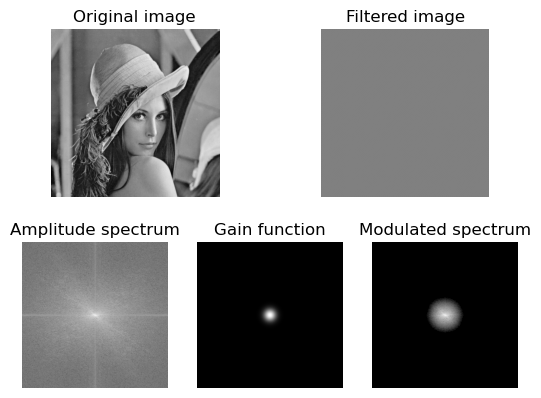

In [11]:
# load image and convert to float
lenna = np.asarray( Image.open("Lenna.png") )
imgL  = np.mean(lenna,axis=2)

# plot original image
plt.subplot2grid((2,2),(0,0))
plt.imshow(imgL,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original image')


# and its power spectrum
imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(imgL))
powr2 = np.log(np.abs(imgX))

plt.subplot2grid((2,3),(1,0))
plt.imshow(powr2,cmap=plt.cm.gray)
plt.clim([0,15])
plt.axis('off')
plt.title('Amplitude spectrum')


# filter kernel is a Gaussian
width = .1 # width of gaussian (normalized Z units)
lims  = np.shape(imgL)
xr    = stats.zscore(np.arange(lims[0]))
[x,y] = np.meshgrid(xr,xr)

# add 1- at beginning of the next line to invert the filter
gaus2d = np.exp( -( x**2 + y**2 ) / (2*width**2) )


# show Gaussian
plt.subplot2grid((2,3),(1,1))
plt.imshow(gaus2d,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gain function')


# show modulated spectrum
plt.subplot2grid((2,3),(1,2))
plt.imshow( np.log(np.abs( np.multiply(imgX,gaus2d)) ) ,cmap=plt.cm.gray)
plt.axis('off')
plt.clim([0,15])
plt.title('Modulated spectrum')


# and the reconstructed image
imgrecon = np.real(scipy.fftpack.ifft2( np.multiply(imgX,gaus2d) ))

plt.subplot2grid((2,2),(0,1))
plt.imshow( imgrecon ,cmap=plt.cm.gray)
plt.axis('off')
plt.title('Filtered image')

plt.show()

1. Tải và chuyển đổi ảnh sang grayscale
Đọc ảnh "Lenna.png" bằng Image.open().
Chuyển ảnh về grayscale bằng cách lấy trung bình 3 kênh màu (np.mean(lenna,axis=2)).
📌 Mục đích: Đơn giản hóa xử lý bằng cách làm việc với ảnh xám thay vì ảnh màu.

2. Tính phổ biên độ của ảnh
Thực hiện Biến đổi Fourier 2D (fft2) để đưa ảnh sang miền tần số.
Dịch tần số về trung tâm (fftshift).
Tính phổ biên độ (Amplitude Spectrum) bằng log(abs(imgX)).
📌 Mục đích: Xác định các thành phần tần số cao/thấp trong ảnh.

3. Tạo bộ lọc Gaussian
Bộ lọc Gaussian 2D được tạo dựa trên tọa độ ảnh.
Tham số width xác định độ rộng của bộ lọc (tần số thấp được giữ lại, tần số cao bị triệt tiêu).
📌 Mục đích: Giữ lại tần số thấp (chi tiết lớn), loại bỏ tần số cao (nhiễu, chi tiết nhỏ).

4. Áp dụng bộ lọc và tái tạo ảnh
Nhân phổ biên độ với bộ lọc Gaussian (np.multiply(imgX,gaus2d)).
Thực hiện Biến đổi Fourier ngược (ifft2) để quay lại miền không gian.
Hiển thị ảnh sau khi lọc.
📌 Mục đích: Làm mờ ảnh (Gaussian Blur) bằng cách loại bỏ tần số cao.

5. Hiển thị kết quả
Mã nguồn vẽ 6 biểu đồ:  Ảnh gốc
 Phổ biên độ (FFT)
 Bộ lọc Gaussian
 Phổ đã lọc
 Ảnh tái tạo sau khi lọc

Nhận xét & Cải tiến
 Ưu điểm:

Lọc Gaussian trong miền tần số giúp làm mờ ảnh mượt mà hơn so với lọc trong miền không gian.
Có thể dễ dàng điều chỉnh tham số width để kiểm soát mức độ làm mờ.
 Cải tiến:

Thử nghiệm với các bộ lọc khác như lọc thông cao (High-pass) để làm sắc nét ảnh.
Điều chỉnh giá trị width để thay đổi mức độ làm mờ.


---
# VIDEO: Image narrowband filtering
---


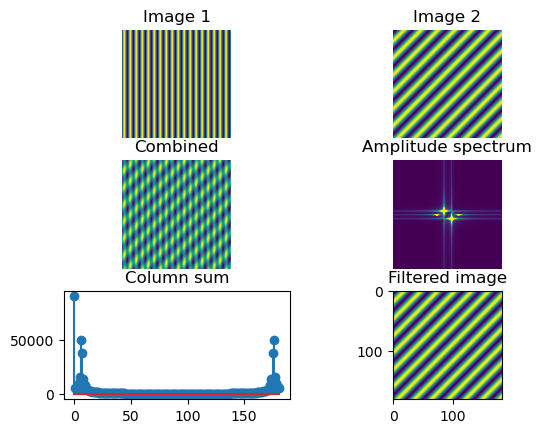

In [12]:

# specify vector of sine phases
sinephas = [ 0 , np.pi/4 ]

# vector of sine frequencies
sinefreq = [.1 , .05] # arbitrary units


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))


# compute 2D sine gradients
xp = x*np.cos(sinephas[0]) + y*np.sin(sinephas[0])
img1 = np.sin( 2*np.pi*sinefreq[0]*xp )

xp = x*np.cos(sinephas[1]) + y*np.sin(sinephas[1])
img2 = np.sin( 2*np.pi*sinefreq[1]*xp )

# combine images
img = img1+img2



# show original two gradients
plt.subplot2grid((3,2),(0,0))
plt.imshow(img1)
plt.axis('off')
plt.title('Image 1')

plt.subplot2grid((3,2),(0,1))
plt.imshow(img2)
plt.axis('off')
plt.title('Image 2')


# show sum
plt.subplot2grid((3,2),(1,0))
plt.imshow(img)
plt.axis('off')
plt.title('Combined')


# FFT
imgX    = scipy.fftpack.fft2(img)
imgXamp = np.abs(imgX)

# show amplitude spectrum
plt.subplot2grid((3,2),(1,1))
plt.imshow(scipy.fftpack.fftshift(imgXamp))
plt.axis('off')
plt.clim([0,500])
plt.title('Amplitude spectrum')

# show sum down columns
plt.subplot2grid((3,2),(2,0))
plt.stem(np.sum(imgXamp,axis=1))
plt.title('Column sum')

# replace 1st column with last
imgX[0,:] = imgX[-1,:]

# reconstructed image
imgrecon  = np.real( scipy.fftpack.ifft2(imgX) )

plt.subplot2grid((3,2),(2,1))
plt.imshow(imgrecon)
plt.title('Filtered image')

plt.show()

1. Tạo sóng sin 2D với các tần số và pha khác nhau
Xác định hai pha sóng: sinephas = [0, π/4]
Xác định hai tần số sóng: sinefreq = [0.1, 0.05]
Tạo lưới tọa độ (x, y) từ -91 đến 91.
Tính 2 ảnh sóng sin theo từng pha và tần số.
📌 Mục đích: Tạo hai mô hình sóng sin 2D, sau đó kết hợp chúng.

2. Hiển thị ảnh gốc và tổng hợp
Vẽ img1 (sóng sin 1) và img2 (sóng sin 2).
Tạo ảnh img = img1 + img2, tức là tổng hợp hai ảnh sóng sin.
📌 Mục đích: Xem ảnh gốc và sự giao thoa của hai sóng.

3. Phân tích miền tần số bằng Biến đổi Fourier
Dùng FFT 2D (fft2) để đưa ảnh img sang miền tần số.
Tính biên độ phổ (np.abs(imgX)).
Dịch phổ về trung tâm (fftshift(imgXamp)) để dễ quan sát.
📌 Mục đích: Xem thành phần tần số của ảnh dưới dạng phổ biên độ.

4. Biến đổi và lọc tần số
Tính tổng biên độ trên từng cột (np.sum(imgXamp,axis=1)) và vẽ biểu đồ.
Thay thế cột đầu tiên của phổ tần số bằng cột cuối cùng (imgX[0,:] = imgX[-1,:]).
Thực hiện Biến đổi Fourier ngược (ifft2) để tái tạo ảnh sau lọc.
📌 Mục đích: Thử nghiệm lọc tần số và xem ảnh tái tạo.

5. Hiển thị kết quả
Mã nguồn vẽ 6 hình: ✅ Ảnh sóng sin 1
✅ Ảnh sóng sin 2
✅ Ảnh tổng hợp (cộng hai ảnh sóng)
✅ Phổ biên độ (FFT)
✅ Tổng biên độ trên từng cột
✅ Ảnh tái tạo sau lọc

Nhận xét & Ứng dụng
✅ Ưu điểm:

Hiểu cấu trúc tần số của ảnh từ tín hiệu sóng sin.
Tổng hợp sóng sin giúp mô phỏng mẫu ảnh có cấu trúc tuần hoàn.
Có thể dùng để tạo mẫu sóng, lọc tần số, và phân tích ảnh nhiễu.
⚠️ Cải tiến:

Điều chỉnh tần số và pha để tạo các mẫu khác nhau.
Thử nghiệm các bộ lọc khác trên phổ Fourier.
Sử dụng Gabor filter thay vì sóng sin thuần túy.
📌 Ứng dụng: Xử lý ảnh, nén ảnh, thị giác máy tính, mô phỏng sóng, phân tích kết cấu ảnh. 🚀